In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import pickle
import copy
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
url = 'https://raw.githubusercontent.com/PULK4N/Data-analysis/master/Recepies_and_it_s_origins/recipes.csv'
df = pd.read_csv(url)

### data cleaning

In [3]:
df.isna().sum().sum()

0

In [4]:
print(df.shape)
print(df.columns)

(10566, 152)
Index(['Unnamed: 0', 'salt', 'oil', 'garlic', 'pepper', 'sugar', 'butter',
       'sauce', 'olive oil', 'onions',
       ...
       'zucchini', 'mirin', 'tomato paste', 'chicken breasts', 'peanut oil',
       'yellow onion', 'fillets', 'lettuce', 'mayonaise', 'country'],
      dtype='object', length=152)


In [5]:
df.drop_duplicates(inplace=False).shape

(10566, 152)

In [6]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [7]:
df['country'].unique()

array(['southern_us', 'french', 'greek', 'mexican', 'italian', 'japanese',
       'chinese', 'thai', 'british'], dtype=object)

#### Pie chart eng

country
british         509
chinese        1291
french         1565
greek           587
italian        1670
japanese        755
mexican        1274
southern_us    2303
thai            612
Name: , dtype: int64

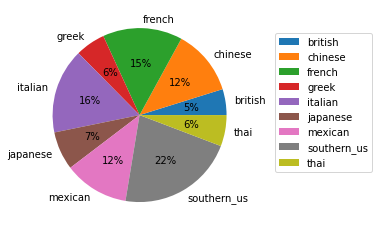

In [8]:
df_recipies = df.groupby(by = 'country').count()
df_recipies = df_recipies['salt']
df_recipies.columns = ['country']
df_recipies.name = ''
df_recipies.plot.pie(y='country', figsize=(4, 4),autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1.1,0.9));
df_recipies

#### Pie chart srb

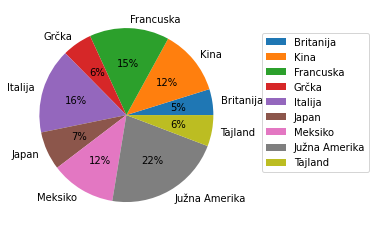

In [9]:
df_recipies = df.groupby(by = 'country').count()
df_recipies = df_recipies['salt']
df_recipies.columns = ['country']
df_recipies.name = ''
df_recipies.index = ['Britanija', 'Kina', 'Francuska', 'Grčka', 'Italija', 'Japan',
       'Meksiko', 'Južna Amerika', 'Tajland']
df_recipies.plot.pie(y='country', figsize=(4, 4),autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1.1,0.9));

#### Getting country correlations

In [10]:
countries = df['country'].unique()

In [11]:
df_for_corr = pd.get_dummies(df, prefix='', prefix_sep='')

In [12]:
countries

array(['southern_us', 'french', 'greek', 'mexican', 'italian', 'japanese',
       'chinese', 'thai', 'british'], dtype=object)

In [13]:
def get_corr_values(df_for_corr,country):
    return df_for_corr.corr()[country].iloc[0:150]

def get_largest_corr(corr,sort_kind, last_corr_index=10):
    corr = copy.deepcopy(corr).round(decimals=2)
    corr = corr.reindex(corr.abs().sort_values(kind=sort_kind,ascending=False).index)
    return corr[0:last_corr_index]


In [14]:
def sort_dictionary(corr_dict):
    sorted_corr_dict = {k: v for k, v in sorted(corr_dict.items(), key=lambda item: abs(item[1][0]),reverse=True)}
    return sorted_corr_dict

In [15]:
corr_dict = {}
for country in countries:
    corr = get_corr_values(df_for_corr,country)
    corr = get_largest_corr(corr,'quicksort', last_corr_index=10)
    corr_dict[country] = corr
#    print(pd.DataFrame(corr_dict[country]))
sorted_corr_dict = sort_dictionary(corr_dict)

In [16]:
print('-------------------------------\n\n')
print(sorted_corr_dict)

-------------------------------


{'thai': fish sauce      0.68
coconut milk    0.56
coconut         0.52
lime            0.36
lime juice      0.30
cilantro        0.28
sauce           0.26
juice           0.23
rice            0.18
chili           0.16
Name: thai, dtype: float64, 'chinese': soy sauce       0.63
sesame          0.52
sesame oil      0.51
ginger          0.48
sauce           0.45
starch          0.42
corn starch     0.41
scallions       0.27
rice vinegar    0.27
wine            0.25
Name: chinese, dtype: float64, 'greek': feta cheese      0.59
oregano          0.28
cucumber         0.28
dried oregano    0.24
lemon            0.24
lemon juice      0.23
olive oil        0.21
mint             0.20
olives           0.16
cheese           0.16
Name: greek, dtype: float64, 'mexican': tortillas           0.55
cumin               0.46
cilantro            0.40
ground cumin        0.37
chili powder        0.34
avocado             0.33
sour cream          0.32
jalapeno chilies    0.2

In [17]:
first3pairs = {k: sorted_corr_dict[k] for k in list(sorted_corr_dict)[0:3]}

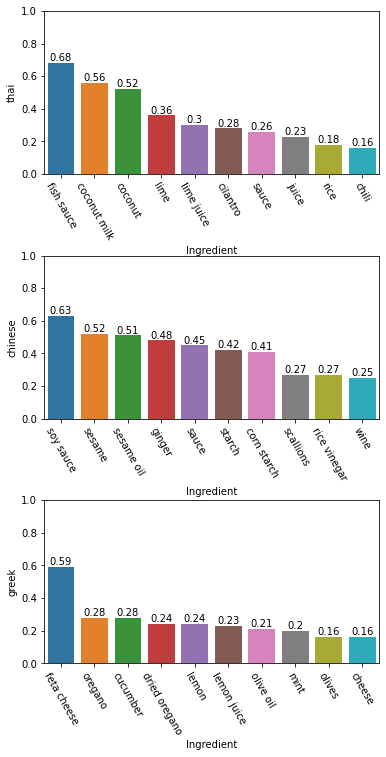

In [18]:

fig, axes = plt.subplots(3,figsize=(6,12))
fig.subplots_adjust(hspace=0.5)
plt.xticks(rotation=300)
i = 0
for country in first3pairs.keys():
    axes[i] = sns.barplot(x = first3pairs[country].index, y = first3pairs[country].values,ax=axes[i])
    axes[i].set_ylim([0,1])
    axes[i].set_xticklabels(labels=first3pairs[country].index,rotation=300)
    axes[i].set(xlabel='Ingredient', ylabel=country)
    axes[i].bar_label(axes[i].containers[0],label_type='edge')
    i+=1

In [19]:
df.head(5)

,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,water,...,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise,country
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,french
2,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,french
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,greek


#### Separate one test set for testing model later on

In [20]:
X = df.iloc[:,0:-1]
X_knn = copy.deepcopy(X)
for column in X_knn.columns:
    X_knn[column] = X_knn[column].astype(bool)

y = df['country']
X_train_knn, X_test_knn, y_train, y_test = train_test_split(X_knn, y, test_size=0.1, random_state=42)

y = df['country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)

In [21]:
sum = 0
for column in X.columns:
    sum += X_train_knn[column].unique().sum()
print(sum)

150


In [22]:
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

metrics = ['jaccard', 'dice']

In [23]:
k_neighboors = [1,3,5,7,11,int(np.sqrt(len(df)))]
for i in range(0,5):
    rand = 1
    while rand in k_neighboors:
        rand = np.random.randint(0,50)
    k_neighboors.append(rand)
print(k_neighboors)

[1, 3, 5, 7, 11, 102, 37, 30, 16, 8, 25]


In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes). 

In [24]:
def knn(k_neighboors,metrics,X_train,y_train):
    final_params = []
    for k in k_neighboors:
        for m in metrics:
            indexes = kf.split(X_train, y_train)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
    
            micro_prec_tmp = []
            makro_prec_tmp = []
            micro_recl_tmp = []
            macro_recl_tmp = []
            micro_f1sc_tmp = []
            macro_f1sc_tmp = []

            models = []
            
            for train_index, test_index in indexes:
                classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
                models.append(classifier.fit(X_train.iloc[train_index,:], y_train.iloc[train_index]))
                y_pred = classifier.predict(X_train.iloc[test_index,:])

                acc_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
                fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred)
                #scores
                micro_prec_tmp.append(precision_score(y_train.iloc[test_index], y_pred, average='micro'))
                makro_prec_tmp.append(precision_score(y_train.iloc[test_index], y_pred, average='macro'))
                micro_recl_tmp.append(recall_score(y_train.iloc[test_index], y_pred, average='micro'))
                macro_recl_tmp.append(recall_score(y_train.iloc[test_index], y_pred, average='macro'))
                micro_f1sc_tmp.append(f1_score(y_train.iloc[test_index], y_pred, average='micro'))
                macro_f1sc_tmp.append(f1_score(y_train.iloc[test_index], y_pred, average='macro'))
            fig, ax = plt.subplots(figsize=(7,7))
            disp = ConfusionMatrixDisplay(confusion_matrix = fin_conf_mat,  display_labels=classifier.classes_)
            disp.plot(cmap="Blues", values_format='', xticks_rotation=90, ax = ax)  
            plt.show()
            params = {}
            params['micro prec'] = np.mean(micro_prec_tmp)
            params['makro prec'] = np.mean(makro_prec_tmp)
            params['micro recl'] = np.mean(micro_recl_tmp)
            params['macro recl'] = np.mean(macro_recl_tmp)
            params['micro f1sc'] = np.mean(micro_f1sc_tmp)
            params['macro f1sc'] = np.mean(macro_f1sc_tmp)
            params['accuracy'] = np.mean(acc_tmp)
            model = models[-1]
            print([k,m])
            print(f'accuracy = {params["accuracy"]}')
            params['knn params'] = {
                    'k neighboors':k,
                    'metric':m,
                    'confusion matrix':fin_conf_mat,
                    'conf matrix indexes': classifier.classes_,
                    'model' : model,
                    }
            final_params.append(params)
    return final_params

/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarn

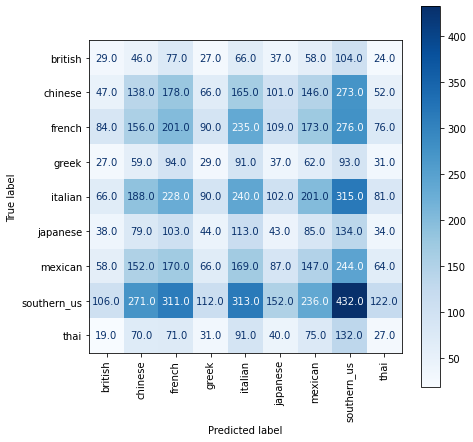

[1, 'jaccard']
accuracy = 0.13524028401788654


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/niko

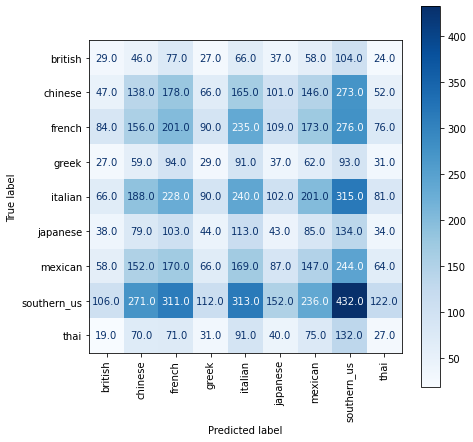

[1, 'dice']
accuracy = 0.13524028401788654


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarn

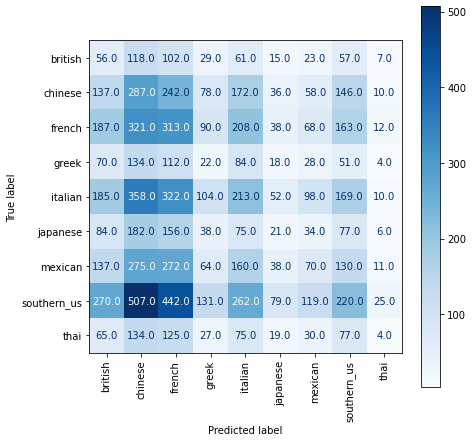

[3, 'jaccard']
accuracy = 0.12682715695333993


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/niko

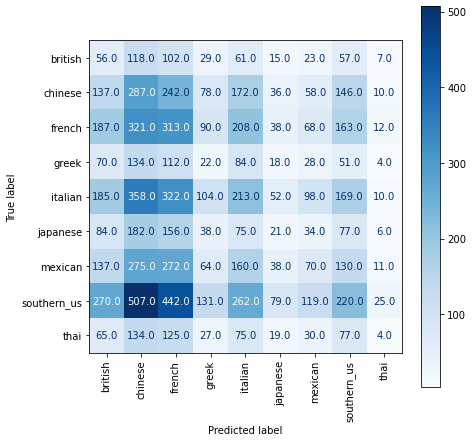

[3, 'dice']
accuracy = 0.12682715695333993


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarn

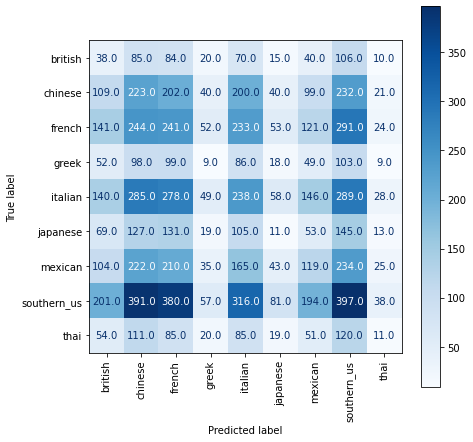

[5, 'jaccard']
accuracy = 0.13534590117792009


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/niko

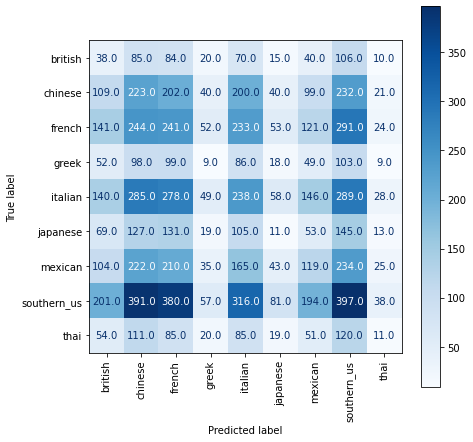

[5, 'dice']
accuracy = 0.13534590117792009


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarn

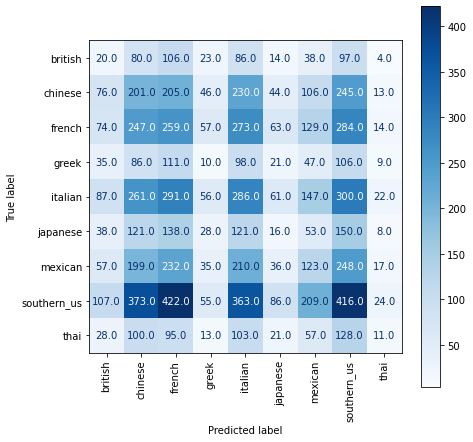

[7, 'jaccard']
accuracy = 0.14112908793508164


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/niko

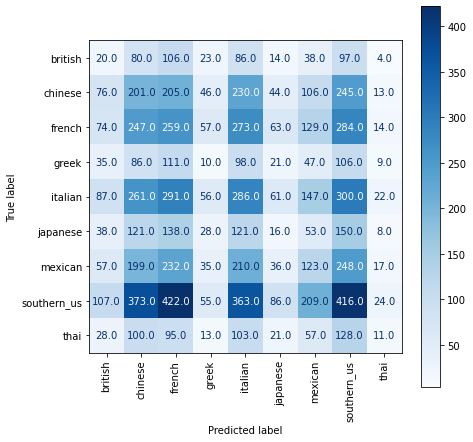

[7, 'dice']
accuracy = 0.14112908793508164


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarn

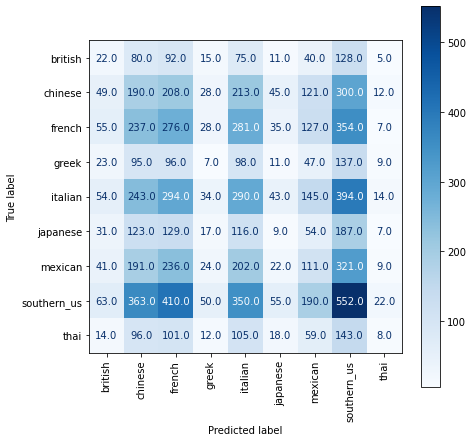

[11, 'jaccard']
accuracy = 0.15406569639613804


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/niko

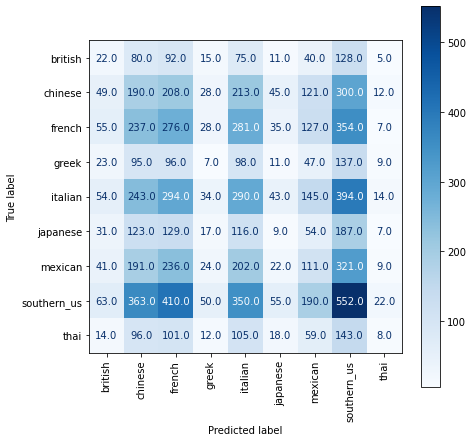

[11, 'dice']
accuracy = 0.15406569639613804


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

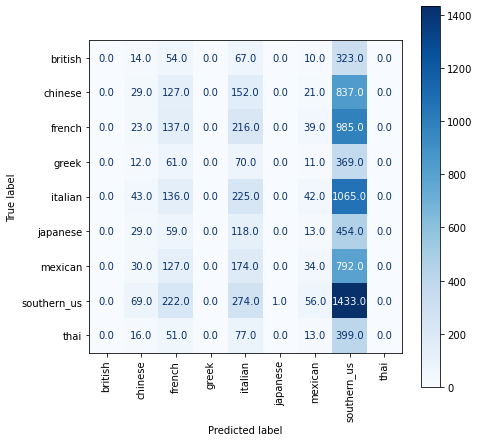

[102, 'jaccard']
accuracy = 0.19539559634196857


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

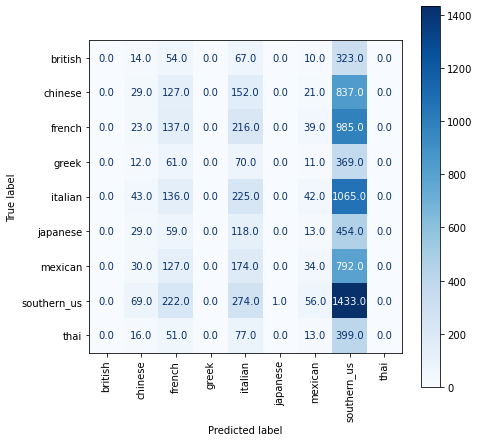

[102, 'dice']
accuracy = 0.19539559634196857


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: Da

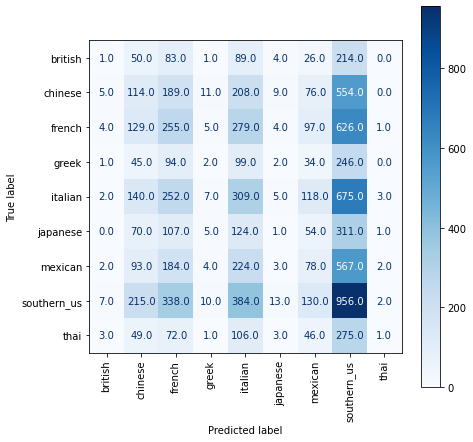

[37, 'jaccard']
accuracy = 0.18056717277931789


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConvers

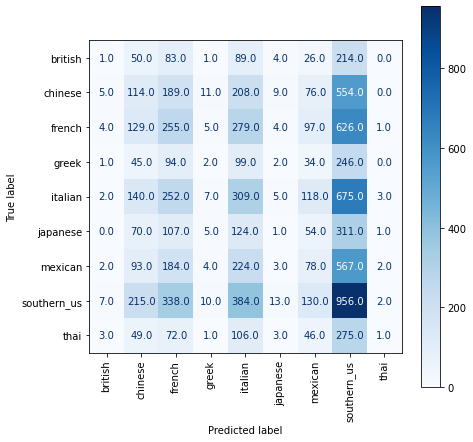

[37, 'dice']
accuracy = 0.18056717277931789


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: Da

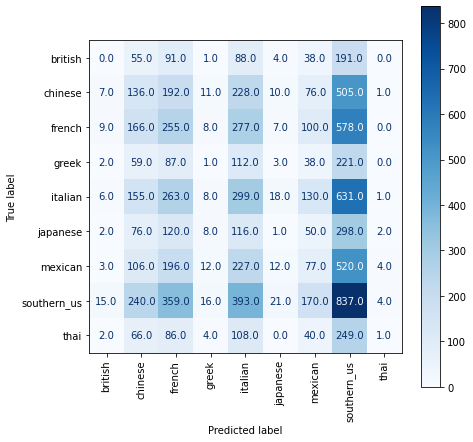

[30, 'jaccard']
accuracy = 0.1689996043505507


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConvers

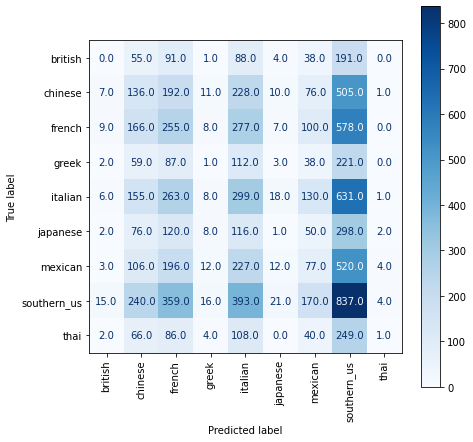

[30, 'dice']
accuracy = 0.1689996043505507


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarn

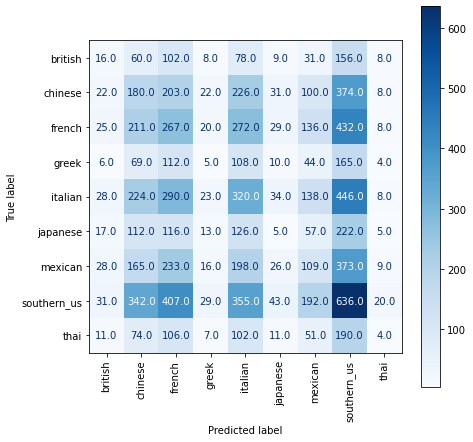

[16, 'jaccard']
accuracy = 0.16216263582194182


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/niko

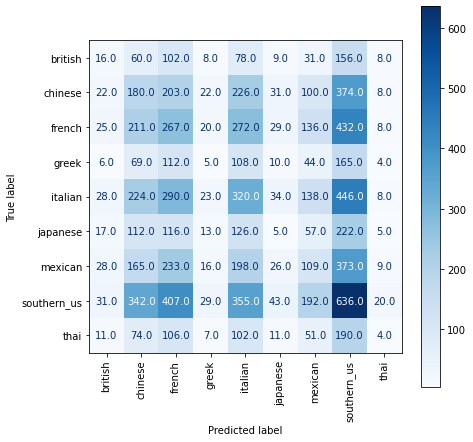

[16, 'dice']
accuracy = 0.16216263582194182


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarn

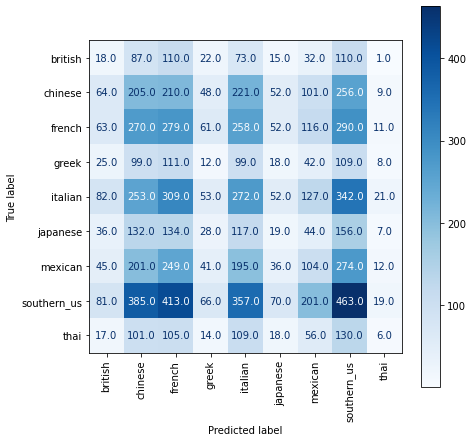

[8, 'jaccard']
accuracy = 0.14491603734505942


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/niko

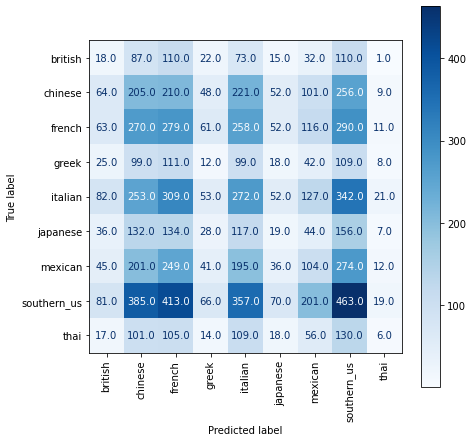

[8, 'dice']
accuracy = 0.14491603734505942


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarn

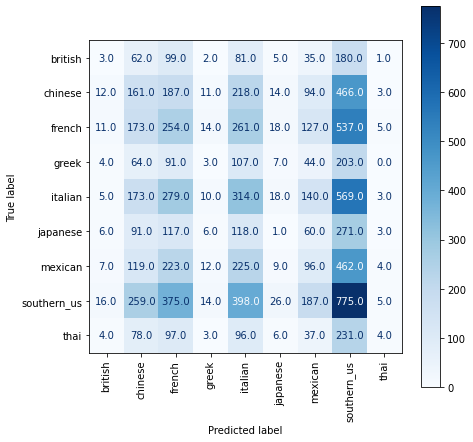

[25, 'jaccard']
accuracy = 0.16941974954593253


/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/niko

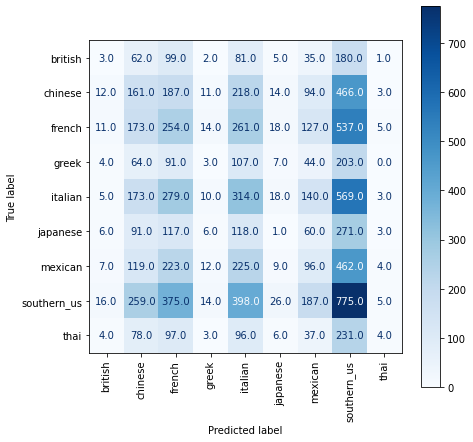

[25, 'dice']
accuracy = 0.16941974954593253


In [25]:
final_params = knn(k_neighboors=k_neighboors,metrics=metrics,X_train=X_train_knn, y_train=y_train);

In [26]:
best_val = max(final_params, key=lambda x:x['accuracy'])
max_accuracy_index = [i for i,_ in enumerate(final_params) if _ == best_val][0]

In [27]:
iter = max_accuracy_index
print('accuracy :', best_val['accuracy'])
print('Neighboors k:{} , metric: {}'.format(best_val['knn params']['k neighboors'],best_val['knn params']['metric']))
with open('KNN model.sav', 'wb') as f:
    pickle.dump(best_val['knn params']['model'],f)

accuracy : 0.19539559634196857
Neighboors k:102 , metric: jaccard


accuracy:  0.19539559634196857
precision micro:  0.19539559634196857
precision macro:  0.08585729446166109
recall micro:  0.19539559634196857
recall macro:  0.11093200177760465
f1 score micro:  0.19539559634196857
f1 score macro:  0.07659148812685664


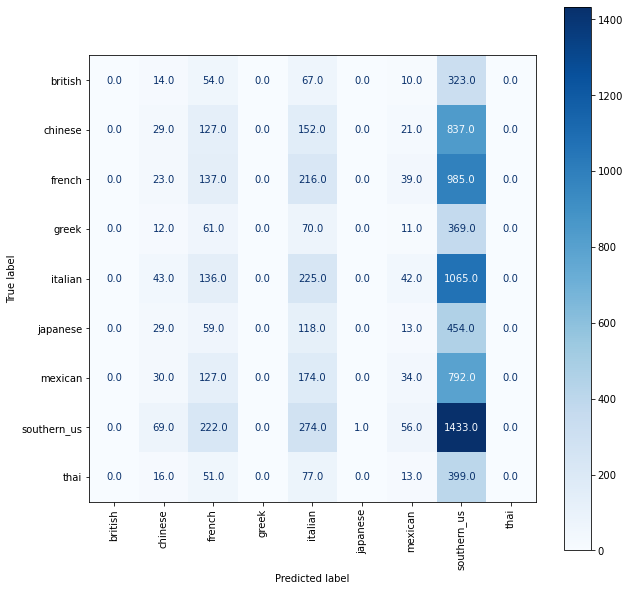

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix = best_val['knn params']['confusion matrix'],  display_labels=best_val['knn params']['conf matrix indexes'])
disp.plot(cmap='Blues',values_format='', xticks_rotation=90,ax=ax);

print('accuracy: ', best_val['accuracy'])
print('precision micro: ',   best_val['micro prec'])
print('precision macro: ',   best_val['makro prec'])
print('recall micro: ',  best_val['micro recl'])
print('recall macro: ',  best_val['macro recl'])
print('f1 score micro: ',       best_val['micro f1sc'])
print('f1 score macro: ',       best_val['macro f1sc'])

In [29]:
def plot_individual_confusion_matrix(index,conf_matrix,name,ax):
    rows = ['True','False']
    columns = ['True','False']
    TP = conf_matrix[index,index]
    FN = conf_matrix[index].sum() - TP
    FP = conf_matrix[:,index].sum() - TP
    TN = conf_matrix.sum() - FN - FP - TP
    matrix = np.array([[TP,FN],[FP,TN]])
    matrix = matrix/np.sum(matrix)
    sns.heatmap(matrix, annot=True, cmap='Blues',fmt='.2%',ax=ax)
    ax.set_title(f'Confusion Matrix for {name} food\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['True','False'])
    ax.yaxis.set_ticklabels(['True','False'])
    return

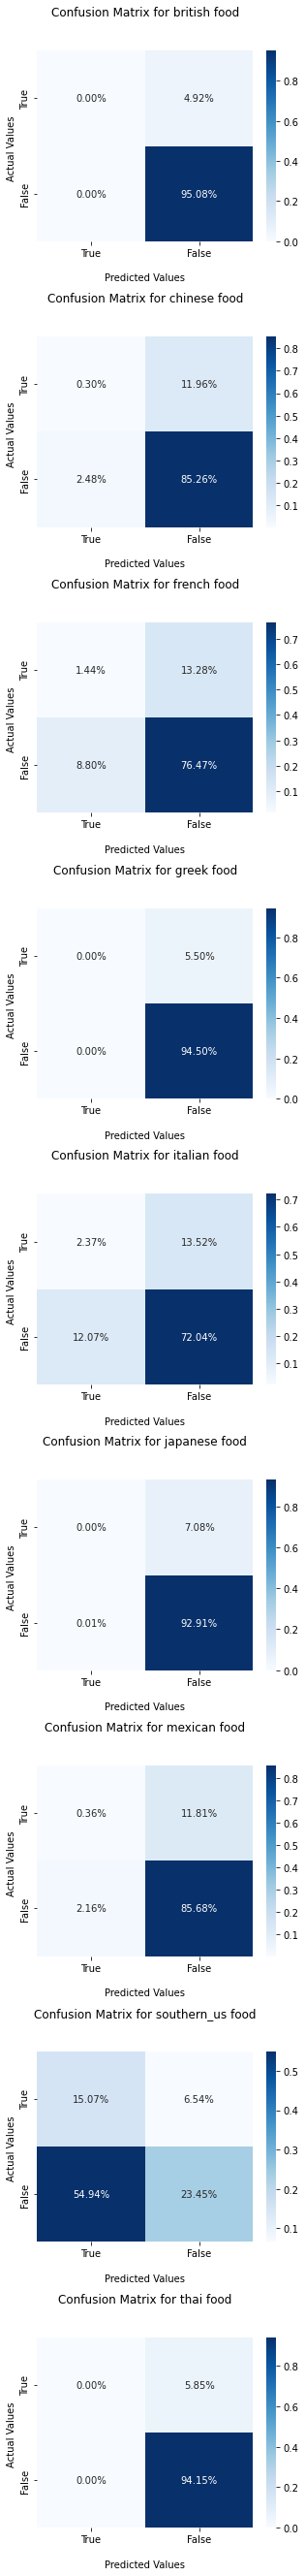

In [30]:
conf_matrix = best_val['knn params']['confusion matrix']
names = best_val['knn params']['conf matrix indexes']
fig, axes = plt.subplots(9,figsize=(5,47))
fig.subplots_adjust(hspace=0.5)
for i in range(0,len(names)):
    plot_individual_confusion_matrix(i,conf_matrix,names[i],axes[i])

In [31]:
with open('KNN model.sav', 'rb') as f:
    loaded_model = pickle.load(f)
result = loaded_model.score(X_test_knn,y_test)
print(result)

/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


0.19962157048249762


In [32]:
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
c_list = [1, 10]

kernels = ['linear', 'rbf']
dec_functions = ['ovo', 'ovr']

In [33]:
def SVM(c_list,kernels,dec_functions, X_train, y_train):
    final_params = []
    for c in c_list:
        for F in kernels:
            for mc in dec_functions:
                indexes = kf.split(X_train, y_train)
                acc_tmp = []
                micro_prec_tmp = []
                makro_prec_tmp = []
                micro_recl_tmp = []
                macro_recl_tmp = []
                micro_f1sc_tmp = []
                macro_f1sc_tmp = []
                models = []
                fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
                for train_index, test_index in indexes:
                    classifier = SVC(C=c, kernel=F, decision_function_shape=mc)
                    models.append(classifier.fit(X_train.iloc[train_index,:], y_train.iloc[train_index]))
                    y_pred = classifier.predict(X_train.iloc[test_index,:])
                    acc_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
                    fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred)
                    #scores
                    micro_prec_tmp.append(precision_score(y_train.iloc[test_index], y_pred, average='micro'))
                    makro_prec_tmp.append(precision_score(y_train.iloc[test_index], y_pred, average='macro'))
                    micro_recl_tmp.append(recall_score(y_train.iloc[test_index], y_pred, average='micro'))
                    macro_recl_tmp.append(recall_score(y_train.iloc[test_index], y_pred, average='macro'))
                    micro_f1sc_tmp.append(f1_score(y_train.iloc[test_index], y_pred, average='micro'))
                    macro_f1sc_tmp.append(f1_score(y_train.iloc[test_index], y_pred, average='macro'))

                params = {}
                params['micro prec'] = np.mean(micro_prec_tmp)
                params['makro prec'] = np.mean(makro_prec_tmp)
                params['micro recl'] = np.mean(micro_recl_tmp)
                params['macro recl'] = np.mean(macro_recl_tmp)
                params['micro f1sc'] = np.mean(micro_f1sc_tmp)
                params['macro f1sc'] = np.mean(macro_f1sc_tmp)
                params['accuracy'] = np.mean(acc_tmp)
                model = models[-1]
                print(f'Regularization parameter: {c}, kernel: {F}, decision function {mc}')
                print(f'accuracy = {params["accuracy"]}')
                params['SVM params'] = {
                        'regularization param':c,
                        'kernel':F,
                        'decision function':mc,
                        'confusion matrix':fin_conf_mat,
                        'conf matrix indexes': classifier.classes_,
                        'model' : model,
                        }
                final_params.append(params)
    return final_params

In [34]:
final_params = SVM(c_list,kernels,dec_functions, X_train, y_train)

Regularization parameter: 1, kernel: linear, decision function ovo
accuracy = 0.7101686555353748
Regularization parameter: 1, kernel: linear, decision function ovr
accuracy = 0.7101686555353748
Regularization parameter: 1, kernel: rbf, decision function ovo
accuracy = 0.7344613325685881
Regularization parameter: 1, kernel: rbf, decision function ovr
accuracy = 0.7344613325685881
Regularization parameter: 10, kernel: linear, decision function ovo
accuracy = 0.6994417094180502
Regularization parameter: 10, kernel: linear, decision function ovr
accuracy = 0.6994417094180502
Regularization parameter: 10, kernel: rbf, decision function ovo
accuracy = 0.7257330136273353
Regularization parameter: 10, kernel: rbf, decision function ovr
accuracy = 0.7257330136273353


In [35]:
best_val = max(final_params, key=lambda x:x['accuracy'])
max_accuracy_index = [i for i,_ in enumerate(final_params) if _ == best_val][0]

In [36]:
iter = max_accuracy_index
best_val_svm_params = best_val['SVM params']
print('accuracy :', best_val['accuracy'])
print('regularization param:{} , kernel: {}, decision function: {}'.format(best_val_svm_params['regularization param'],best_val_svm_params['kernel'],best_val_svm_params['decision function']))
with open('SVM model.sav', 'wb') as f:
    pickle.dump(best_val['SVM params']['model'],f)

accuracy : 0.7344613325685881
regularization param:1 , kernel: rbf, decision function: ovo


accuracy:  0.7344613325685881
precision micro:  0.7344613325685881
precision macro:  0.774715576005976
recall micro:  0.7344613325685881
recall macro:  0.6824068265959967
f1 score micro:  0.7344613325685881
f1 score macro:  0.7076342022770943


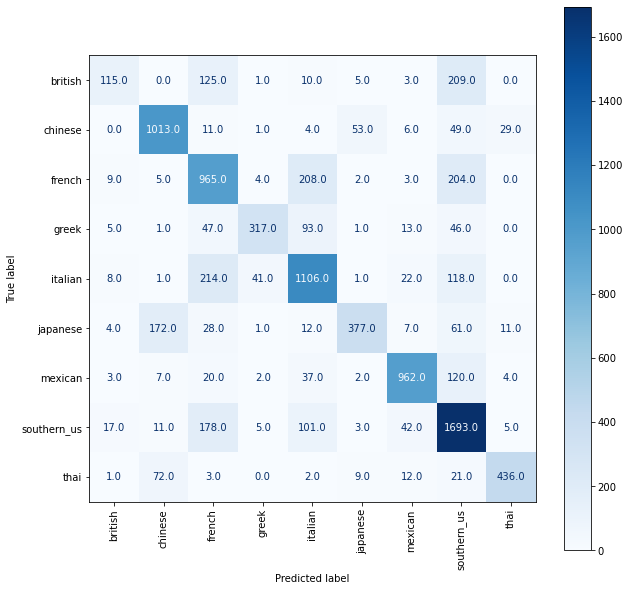

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix = best_val['SVM params']['confusion matrix'],  display_labels=best_val['SVM params']['conf matrix indexes'])
disp.plot(cmap='Blues',values_format='', xticks_rotation=90,ax=ax);

print('accuracy: ', best_val['accuracy'])
print('precision micro: ',   best_val['micro prec'])
print('precision macro: ',   best_val['makro prec'])
print('recall micro: ',  best_val['micro recl'])
print('recall macro: ',  best_val['macro recl'])
print('f1 score micro: ',       best_val['micro f1sc'])
print('f1 score macro: ',       best_val['macro f1sc'])

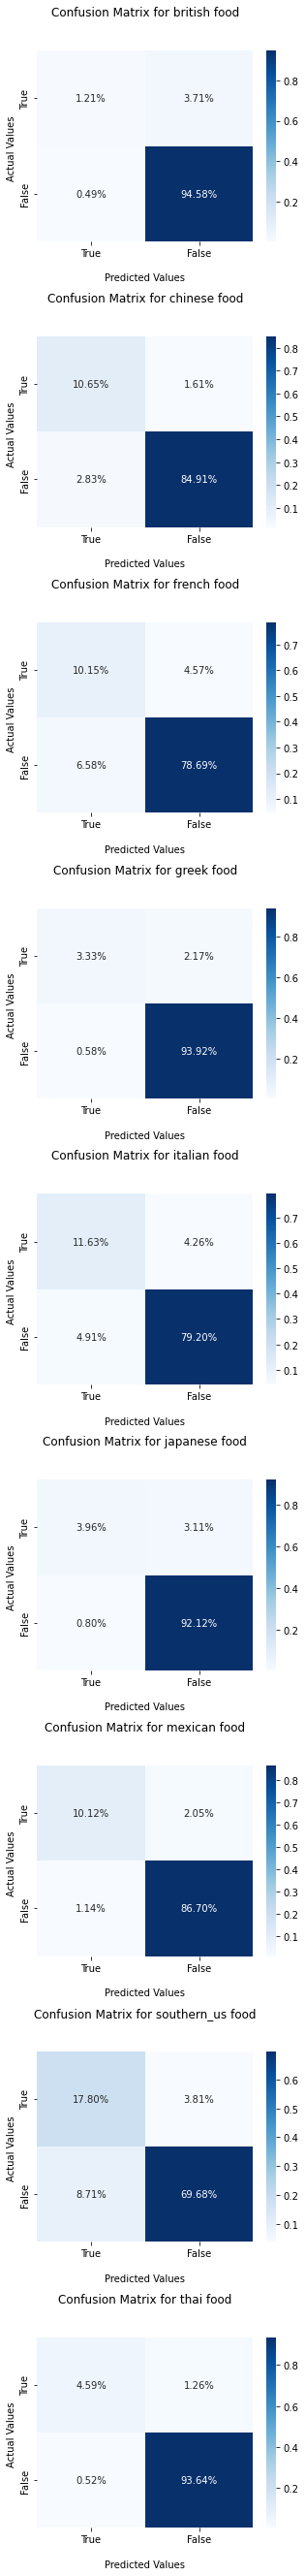

In [38]:
conf_matrix = best_val['SVM params']['confusion matrix']
names = best_val['SVM params']['conf matrix indexes']
fig, axes = plt.subplots(9,figsize=(5,47))
fig.subplots_adjust(hspace=0.5)
for i in range(0,len(names)):
    plot_individual_confusion_matrix(i,conf_matrix,names[i],axes[i])

In [39]:
with open('SVM model.sav', 'rb') as f:
    loaded_model = pickle.load(f)
result = loaded_model.score(X_test,y_test)
print(result)

0.7407757805108799
